In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=5,
                  random_state=10)
X.shape, y.shape

((100, 2), (100,))

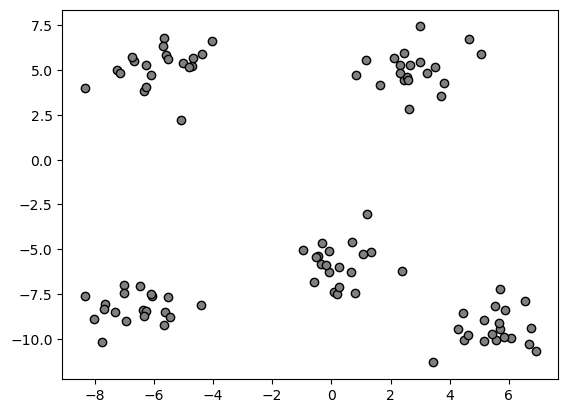

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],
            c='gray',
            edgecolor='black',
            marker='o')

In [6]:
# K-means-clustering
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5,
             init='random',
             max_iter=100,
             random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_
label_kmc

/home/bml_th/miniforge3/envs/th/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 4, 3, 0, 2, 1, 1, 3, 2, 1, 3, 1, 2, 0, 2, 1, 4, 0, 2, 1, 1, 0,
       4, 3, 1, 1, 0, 2, 3, 4, 0, 0, 2, 0, 1, 2, 3, 0, 3, 4, 0, 0, 0, 2,
       3, 3, 1, 2, 4, 2, 4, 2, 1, 3, 2, 2, 0, 4, 0, 3, 2, 4, 4, 0, 1, 4,
       2, 4, 2, 3, 3, 1, 4, 2, 0, 0, 3, 4, 1, 1, 2, 2, 4, 0, 4, 3, 0, 3,
       0, 3, 4, 3, 1, 4, 4, 4, 3, 1, 1, 3], dtype=int32)

In [11]:
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns = kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,1
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,0
4,6.550104,-7.912339,0,2


In [12]:
# unique type of target class
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


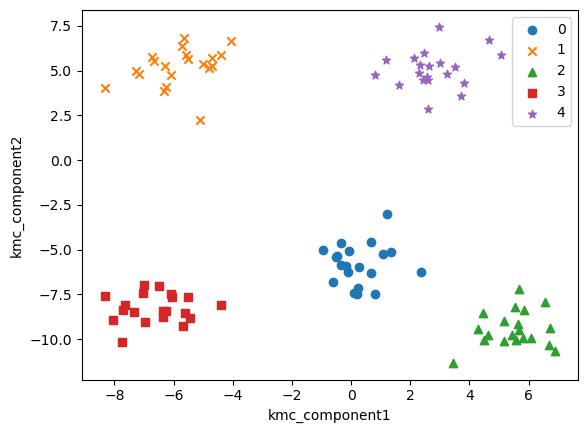

In [15]:
# plot: k-maens-clustering
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc'] == i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2,
                marker = mark,
                label = target_i)
plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

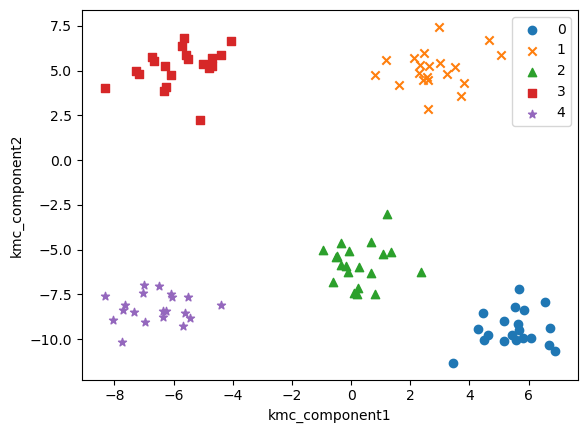

In [16]:
# plot: actual target
df = X_kmc_df
markers = ['o','x', '^', 's','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)
    
plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [17]:
# model evaluation
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782
